In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.sandbox.stats.multicomp import multipletests

In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
data=pd.read_csv('churn_analysis.csv')
data.head()

,Unnamed: 0,state,account_length,area_code,intl_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,...,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,treatment,mes_estim,churn
0,0,KS,128,415,no,yes,25,265.1,110,45.07,...,244.7,91,11.01,10.0,3,2.70,1,1,0.65,False.
1,1,OH,107,415,no,yes,26,161.6,123,27.47,...,254.4,103,11.45,13.7,3,3.70,1,0,0.55,False.
2,2,NJ,137,415,no,no,0,243.4,114,41.38,...,162.6,104,7.32,12.2,5,3.29,0,0,0.72,False.
3,3,OH,84,408,yes,no,0,299.4,71,50.90,...,196.9,89,8.86,6.6,7,1.78,2,1,0.28,False.
4,4,OK,75,415,yes,no,0,166.7,113,28.34,...,186.9,121,8.41,10.1,3,2.73,3,2,0.45,False.


В этом задании вам предлагается проанализировать данные одной из американских телекоммуникационных компаний о пользователях, которые потенциально могут уйти.

Измерены следующие признаки:

* state — штат США
* account_length — длительность использования аккаунта
* area_code — деление пользователей на псевдорегионы, использующееся в телекоме
* intl_plan — подключена ли у пользователя услуга международного общения
* vmail_plan — подключена ли у пользователя услуга голосовых сообщений
* vmail_message — количество голосых сообщений, который пользователь отправил / принял
* day_calls — сколько пользователь совершил дневных звонков
* day_mins — сколько пользователь проговорил минут в течение дня
* day_charge — сколько пользователь заплатил за свою дневную активность
* eve_calls, eve_mins, eve_charge — аналогичные метрики относительно вечерней активности
* night_calls, night_mins, night_charge — аналогичные метрики относительно ночной активности
* intl_calls, intl_mins, intl_charge — аналогичные метрики относительно международного общения
* custserv_calls — сколько раз пользователь позвонил в службу поддержки
* treatment — номер стратегии, которая применялись для удержания абонентов (0, 2 = два разных типа воздействия, 1 = контрольная группа)
* mes_estim — оценка интенсивности пользования интернет мессенджерами
* churn — результат оттока: перестал ли абонент пользоваться услугами оператора

Ответы:
1. 34
+ ?
+ * Количество достигаемых уровней значимости, меньших, чем 0.05, в точности равно нулю. То есть поправка увеличила достигаемые уровни значимости настолько, что больше ни одно из значений достигаемого уровня значимости не попадает в диапазон от 0 до 0.05.
  * Достигаемые уровни значимости на наших данных, полученные с помощью критерия xи-квадрат с поправкой Йетса, в среднем получаются больше, чем соответствующие значения без поправки.
+ * Точный критерий Фишера на наших данных дает значения достигаемого уровня значимости в среднем меньшие, чем xи-квадрат с поправкой Йетса
  * Точный критерий Фишера на наших данных дает значения достигаемого уровня значимости в среднем значительно большие, чем xи-квадрат без поправки
  * Точный критерий Фишера всегда лучше, чем критерий xи-квадрат, потому что не использует аппроксимацию дискретного распределения непрерывным. Однако при увеличении размера выборки его преимущества по сравнению с критерем xи-квадрат уменьшаются, в пределе достигая нуля.
+ Корреляция Пирсона имеет отрицательный знак, и отличие корреляции от нуля на уровне доверия 0.05 значимо.
+ Корреляция Спирмена имеет положительный знак, и отличие корреляции от нуля на уровне доверия 0.05 значимо.
+ Посчитанные корреляции и их значимости говорят лишь о том, что необходимо взглянуть на данные глазами и попытаться понять, что приводит к таким (противоречивым?) результатам.
+ Для вычисления коэффициента Крамера используется значение статистики xи-квадрат, на которую мы не можем положиться применительно к нашим данным.
+   * treatment = 2 статистически значимо отличается от контрольной группы treatment = 1
    * Отличие между treatment = 0 и treatment = 2 относительно влияния на уровень churn статистически незначимо.

# +Task 1
Давайте рассмотрим всех пользователей из контрольной группы (treatment = 1). Для таких пользователей мы хотим проверить гипотезу о том, что штат абонента не влияет на то, перестанет ли абонент пользоваться услугами оператора.

Для этого мы воспользуемся критерием хи-квадрат. Постройте таблицы сопряженности между каждой из всех 1275 возможных неупорядоченных пар штатов и значением признака churn. Для каждой такой таблицы 2x2 применить критерий хи-квадрат можно с помощью функции

In [7]:
a=pd.Series(data=[state1,state2,p1,p2],index=['s','s2','p1','p2'])
b=pd.DataFrame(columns=['s','s2','p1','p2'])
b.loc[0]=a
b
#b.append(a)

NameError: name 'state1' is not defined

In [8]:
alpha=0.05
qty1=0
qty2=0
data1=data[data.treatment==1]
state=data1.state.value_counts().index
res=pd.DataFrame(columns=['state1','state2','p1','p2'])
for i,state1 in enumerate(state):
    for j,state2 in enumerate(state):
        if j<=i: 
            continue
        print (state1,state2,end=' ')
        subtable=pd.DataFrame()
        subtable.loc[state1,'True']=data1[(data1.state==state1)&(data1.churn=='True.')].shape[0]
        subtable.loc[state1,'False']=data1[(data1.state==state1)&(data1.churn=='False.')].shape[0]
        subtable.loc[state2,'True']=data1[(data1.state==state2)&(data1.churn=='True.')].shape[0]
        subtable.loc[state2,'False']=data1[(data1.state==state2)&(data1.churn=='False.')].shape[0]
        chi21, p1, dof1, ex1= stats.chi2_contingency(subtable, correction=False)
        chi22, p2, dof2, ex2= stats.chi2_contingency(subtable, correction=True)
        if p1<alpha:
            qty1=qty1+1
        if p2<alpha:
            qty2=qty2+1            
        print (round(p1,4),round(p2,4))
        row=pd.Series(data=[state1,state2,p1,p2],index=['state1','state2','p1','p2'])
        res.loc[len(res)]=row
print("qty1=",qty1," qty2=",qty2)

NY WV 0.7834 0.9554
NY AL 0.8743 0.8618
NY CT 0.8743 0.8618
NY NM 0.186 0.3457
NY ME 0.3363 0.5118
NY MT 0.7762 0.9481
NY KS 0.3746 0.5686
NY KY 0.8276 0.8941
NY NE 0.5614 0.8314
NY MD 0.8022 0.9287
NY MA 0.3291 0.5117
NY WI 0.2906 0.5024
NY OH 0.2906 0.5024
NY ND 0.5614 0.8314
NY MS 0.882 0.8382
NY NV 0.533 0.7685
NY NJ 0.882 0.8382
NY SD 0.6065 0.8845
NY WA 0.2853 0.4552
NY VA 0.6065 0.8845
NY IN 0.6065 0.8845
NY VT 0.7417 0.9903
NY UT 1.0 1.0
NY WY 0.3488 0.5847
NY CO 0.6797 0.9451
NY RI 1.0 1.0
NY MI 0.6797 0.9451
NY GA 0.3826 0.6311
NY MO 0.9364 0.7799
NY MN 0.3826 0.6311
NY SC 0.6167 0.8776
NY OR 0.708 1.0
NY AK 0.1695 0.3394
NY TX 0.319 0.5106
NY FL 0.42 0.6813
NY NC 0.8262 0.8721
NY AZ 0.4613 0.7356
NY DC 0.1887 0.3722
NY ID 0.507 0.7943
NY PA 0.7284 0.9827
NY DE 0.2351 0.449
NY AR 0.3039 0.5073
NY CA 0.247 0.4312
NY LA 0.0775 0.1954
NY IA 0.6761 1.0
NY HI 0.3725 0.6628
NY OK 0.8217 0.8363
NY NH 0.9064 0.7465
NY IL 0.4202 0.7331
NY TN 0.4202 0.7331
WV AL 0.9113 0.815
WV CT 0.91

**Ответ 1**

34

**Ответ 2 ** 2 первых - 0.6
* Интерпретация числа достигаемых уровней значимости, меньших α=0.05, некорректна, поскольку не сделана поправка на множественную проверку гипотез.
* Хи-квадрат используется для того, чтобы сравнить выборку с некоторым воздействием (treatment) и выборку без этого воздействия (control). Мы же в первом задании сравнивали штаты, используя данные только control группы. Для данных только из control группы использование xи-квадрат неправомерно.
* неверно - Анализ нужно было начинать с применения xи-квадрат к таблице сопряженности, в которой присутствовали сразу все возможные штаты. Достигаемой уровень значимости такой проверки = 0.7, что дает нам гарантию, что нет ни одной пары штатов, в которых отличие в соотношениях ушедших и оставшихся клиентов статистически значимо.
* неверно - Применение критерия xи-квадрат для этих данных не обосновано, потому что не выполняются условия, при которых этот критерий дает правильные результаты.

** Ответ 3 **
* Количество достигаемых уровней значимости, меньших, чем 0.05, в точности равно нулю. То есть поправка увеличила достигаемые уровни значимости настолько, что больше ни одно из значений достигаемого уровня значимости не попадает в диапазон от 0 до 0.05.
* Достигаемые уровни значимости на наших данных, полученные с помощью критерия xи-квадрат с поправкой Йетса, в среднем получаются больше, чем соответствующие значения без поправки.

In [131]:
print (res.p1.mean())
print (res.p2.mean())

0.5018273798739151
0.664056638205104


# Task 4

In [136]:
alpha=0.05
qty1=0
data1=data[data.treatment==1]
state=data1.state.value_counts().index
res1=pd.DataFrame(columns=['state1','state2','p1'])
for i,state1 in enumerate(state):
    for j,state2 in enumerate(state):
        if j<=i: 
            continue
        print (state1,state2,end=' ')
        subtable=pd.DataFrame()
        subtable.loc[state1,'True']=data1[(data1.state==state1)&(data1.churn=='True.')].shape[0]
        subtable.loc[state1,'False']=data1[(data1.state==state1)&(data1.churn=='False.')].shape[0]
        subtable.loc[state2,'True']=data1[(data1.state==state2)&(data1.churn=='True.')].shape[0]
        subtable.loc[state2,'False']=data1[(data1.state==state2)&(data1.churn=='False.')].shape[0]
        obs, p1 = stats.fisher_exact(subtable)
        
        if p1<alpha:
            qty1=qty1+1
        print (round(p1,4))
        row=pd.Series(data=[state1,state2,p1],index=['state1','state2','p1'])
        res1.loc[len(res1)]=row
print("qty1=",qty1)

NY WV 1.0
NY AL 1.0
NY CT 1.0
NY NM 0.2644
NY ME 0.3746
NY MT 1.0
NY KY 1.0
NY KS 0.5265
NY MS 1.0
NY NJ 1.0
NY NV 0.7433
NY MA 0.3567
NY MD 1.0
NY ND 0.7197
NY NE 0.7197
NY WI 0.4462
NY OH 0.4462
NY VT 0.7459
NY WA 0.3439
NY IN 0.7226
NY VA 0.7226
NY SD 0.7226
NY CO 0.7388
NY RI 1.0
NY WY 0.454
NY UT 1.0
NY MI 0.7388
NY OR 1.0
NY MN 0.4612
NY MO 1.0
NY SC 0.7329
NY GA 0.4612
NY TX 0.3348
NY AK 0.2333
NY FL 0.6947
NY DC 0.2422
NY NC 1.0
NY AZ 0.6944
NY ID 0.6959
NY PA 0.7272
NY DE 0.3983
NY AR 0.4663
NY LA 0.1575
NY IA 1.0
NY CA 0.2831
NY OK 1.0
NY HI 0.6541
NY TN 0.6548
NY NH 1.0
NY IL 0.6548
WV AL 1.0
WV CT 1.0
WV NM 0.4288
WV ME 0.3468
WV MT 1.0
WV KY 1.0
WV KS 0.3321
WV MS 1.0
WV NJ 1.0
WV NV 0.5011
WV MA 0.3252
WV MD 0.7296
WV ND 1.0
WV NE 1.0
WV WI 0.6862
WV OH 0.6862
WV VT 0.7257
WV WA 0.2078
WV IN 1.0
WV VA 1.0
WV SD 1.0
WV CO 0.723
WV RI 1.0
WV WY 0.6873
WV UT 1.0
WV MI 0.723
WV OR 1.0
WV MN 0.6897
WV MO 1.0
WV SC 0.4923
WV GA 0.6897
WV TX 0.2989
WV AK 0.3867
WV FL 0.6936
WV D

In [139]:
res1.p1.mean()

0.6483383060020678

** Ответ 4 ** первые 2 - 0.8
* Точный критерий Фишера на наших данных дает значения достигаемого уровня значимости в среднем меньшие, чем xи-квадрат с поправкой Йетса
* Точный критерий Фишера на наших данных дает значения достигаемого уровня значимости в среднем значительно большие, чем xи-квадрат без поправки
* Точный критерий Фишера всегда лучше, чем критерий xи-квадрат, потому что не использует аппроксимацию дискретного распределения непрерывным. Однако при увеличении размера выборки его преимущества по сравнению с критерем xи-квадрат уменьшаются, в пределе достигая нуля.

# Task 5
Давайте попробуем применить полученные знания о разных видах корреляции и ее применимости на практике.

Рассмотрим пару признаков day_calls и mes_estim. Посчитайте корреляцию Пирсона между этими признаками на всех данных, ее значимость.

In [152]:
pearson=stats.stats.pearsonr(data['day_calls'],data['mes_estim'])
pearson

(-0.051794350587572625, 0.0027798836869756707)

$H_0$ : корреляции нет

p-value < 0.05 отвергает H_0

=> Есть корреляция

** Ответ 5 **

Корреляция Пирсона имеет отрицательный знак, и отличие корреляции от нуля на уровне доверия 0.05 значимо.

# Task 6

In [153]:
spearmanr=stats.stats.spearmanr(data['day_calls'],data['mes_estim'])
spearmanr

SpearmanrResult(correlation=0.043349880533927444, pvalue=0.012317367189170541)

$H_0$ : корреляции нет

p-value < 0.05 отвергает H_0

=> Есть корреляция

** Ответ 6 **

* Корреляция Спирмена имеет положительный знак, и отличие корреляции от нуля на уровне доверия 0.05 значимо.

# Task 7

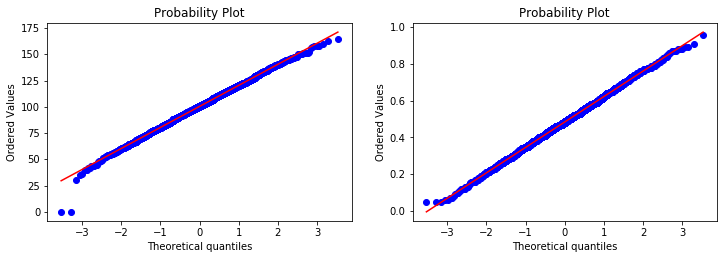

In [6]:
pylab.figure(figsize=(12,8))
pylab.subplot(2,2,1)
stats.probplot(data.day_calls, dist="norm", plot=pylab)
pylab.subplot(2,2,2)
stats.probplot(data.mes_estim, dist="norm", plot=pylab)
pylab.show()

** Ответ 7 **

Посчитанные корреляции и их значимости говорят лишь о том, что необходимо взглянуть на данные глазами и попытаться понять, что приводит к таким (противоречивым?) результатам.

# Task 8
Посчитайте значение коэффицента корреляции Крамера между двумя признаками: штатом (state) и оттоком пользователей (churn) для всех пользователей, которые находились в контрольной группе (treatment=1). Что можно сказать о достигаемом уровне значимости при проверке гипотезы о равенство нулю этого коэффициента?

In [163]:
state=data1.state.value_counts().index
churn=data1.churn.value_counts().index
confusions = []
for s in state:
    for c in churn:
        cond = (data1['state'] == s) & (data1['churn'] == c)
        confusions.append(cond.sum())
confusion_matrix = np.array(confusions).reshape(len(state), len(churn))

In [166]:
def cramers_stat(confusion_matrix):
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    return np.sqrt(chi2 / (n*(min(confusion_matrix.shape)-1)))

result = cramers_stat(confusion_matrix)

In [168]:
result

0.20039321502033319

** Ответ 8 **

неверно - Достигаемый уровень значимости > 0.05, то есть, отличие от нуля значения коэффицента Крамера незначимо.

неверно - Достигаемый уровень значимости < 0.05, то есть, отличие от нуля значения коэффицента Крамера значимо.
* Для вычисления коэффициента Крамера используется значение статистики xи-квадрат, на которую мы не можем положиться применительно к нашим данным.

# Task 9
В этой части задания вам нужно будет самостоятельно решить, с помощью каких методов можно провести анализ эффективности удержания (churn) с помощью раличных методов (treatment = 0, treatment = 2) относительно контрольной группы пользователей (treatment = 1).

Что можно сказать об этих двух методах (treatment = 0, treatment = 2)? Одинаковы ли они с точки зрения эффективности? Каким бы методом вы бы посоветовали воспользоваться компании?

Не забудьте про поправку на множественную проверку! И не пользуйтесь односторонними альтернативами, поскольку вы не знаете, к каким действительно последствиям приводят тестируемые методы (treatment = 0, treatment = 2) !

In [196]:
data0=data[data.treatment==0].churn.map(lambda x: 1 if x=='False.' else 0)
data1=data[data.treatment==1].churn.map(lambda x: 1 if x=='False.' else 0)
data2=data[data.treatment==2].churn.map(lambda x: 1 if x=='False.' else 0)

In [197]:
# Расчет доверительного интервала для разности двух долей
def proportions_diff_confint_ind(sample1, sample2, alpha = 0.05):    
    z = stats.norm.ppf(1 - alpha / 2.) 
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    return (left_boundary, right_boundary)
# Z статистика
def proportions_diff_z_stat_ind(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    
    p1 = float(sum(sample1)) / n1
    p2 = float(sum(sample2)) / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))
# p-value
def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized should be 'two-sided', 'less' or 'greater'")
    if alternative == 'two-sided':
        return 2 * (1 - stats.norm.cdf(np.abs(z_stat)))
    if alternative == 'less':
        return stats.norm.cdf(z_stat)
    if alternative == 'greater':
        return 1 - stats.norm.cdf(z_stat)

In [201]:
def compare(data1,data2,ind):
    print (ind,end=' ')
    print ("ci: [%f, %f]" % proportions_diff_confint_ind(data1, data2),end=' ')
    z_stat = proportions_diff_z_stat_ind(data1, data2)
    p_value=proportions_diff_z_test(z_stat,"two-sided")
    print ("z-stat: %g, p-value: %g" % (z_stat,p_value))
    return p_value

In [202]:
p01=compare(data0,data1,"0 C")
p21=compare(data2,data1,"2 C")
p02=compare(data0,data2,"0 2")

0 C ci: [-0.011583, 0.048489] z-stat: 1.20467, p-value: 0.228331
2 C ci: [0.009619, 0.068322] z-stat: 2.59905, p-value: 0.00934808
0 2 ci: [-0.048856, 0.007821] z-stat: -1.4172, p-value: 0.156425


In [213]:
r,p,a1,a2=multipletests([p01,p21],alpha=0.05,method='holm')
r,p

(array([False,  True], dtype=bool), array([ 0.22833116,  0.01869617]))

** Ответ 9 **
* неверно - treatment = 2 статистически значимо отличается от контрольной группы treatment = 1
* неверно - В дальнейшем телеком компании рекомендуется использовать и treatment = 0, и treatment = 2 для наибольшей эффективности удержения абонентов.
* неверно - Ни один из методов не показал значительного улучшения относительно других, о чем говорит групповой статистический
критерий.
* Отличие между treatment = 0 и treatment = 2 относительно влияния на уровень churn статистически незначимо.